In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.columns = (
    df.columns
    .str.replace("-", "_")
)

In [6]:
print(df.isna().sum())

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
print(df['gender'].unique())

['Female' 'Male' 'Unknown/Invalid']


In [8]:
inv_gender_count = (df['gender'] == 'unknown/invalid').sum()

In [9]:
inv_gender_count

0

In [10]:
# != excludes certain rows based on column values.
df = df[df['gender'] != 'Unknown/Invalid']

In [11]:
print(df['gender'].unique())

['Female' 'Male']


In [12]:
print(df['race'].unique())

['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


In [13]:
inv_race_count = (df['race'] == '?').sum()

In [14]:
inv_race_count

2271

In [15]:
# != like above this operator is used to filter out rows in the df where the race column has the value '?'.
df = df[df['race'] != '?']

In [16]:
df['race'] = df['race'].replace({'AfricanAmerican': 'African American'})

In [17]:
print(df['race'].unique())

['Caucasian' 'African American' 'Other' 'Asian' 'Hispanic']


In [18]:
print(df['age'].unique())

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


In [19]:
# r'...' This ensures that special characters like \ are not interpreted by Python
# itself but are passed as regular characters
# '' replaces th () and [] with an empty string thus removing them
# regex=True means str.replace() treats is a regular expression.

df['age'] = df['age'].str.replace(r'[\[\)\)]', '', regex=True)

In [20]:
print(df['age'].unique())

['0-10' '10-20' '20-30' '30-40' '40-50' '50-60' '60-70' '70-80' '80-90'
 '90-100']


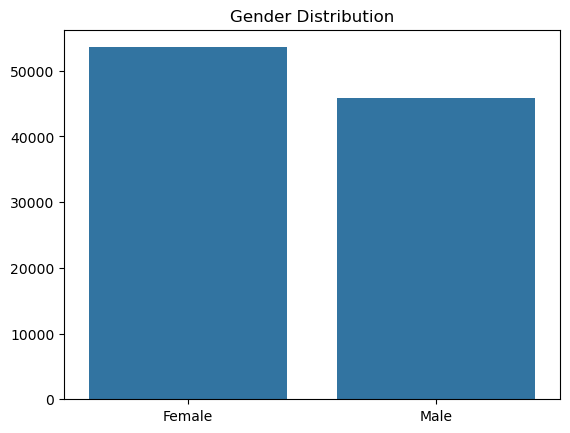

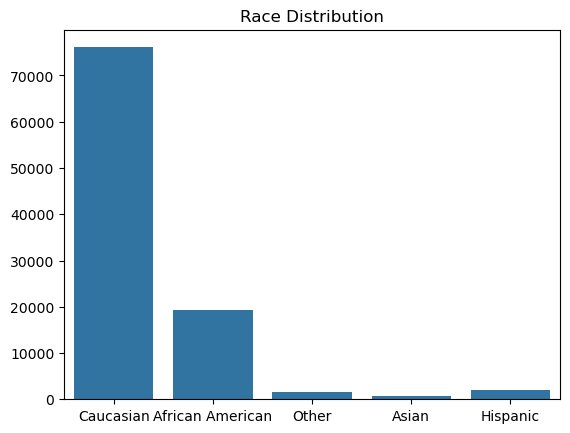

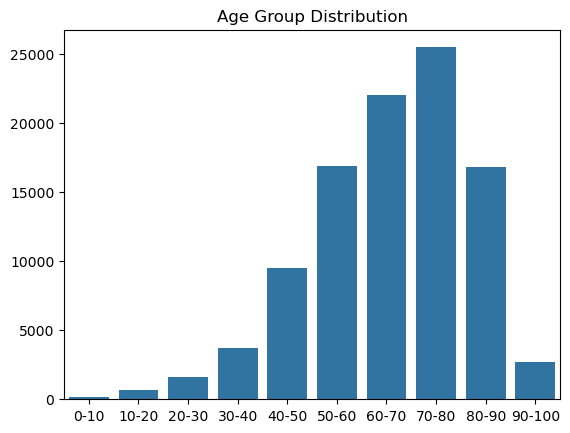

In [21]:
# Gender distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Race distribution
sns.countplot(x='race', data=df)
plt.title('Race Distribution')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Age group distribution
sns.countplot(x='age', data=df)
plt.title('Age Group Distribution')
plt.xlabel('')
plt.ylabel('')
plt.show()

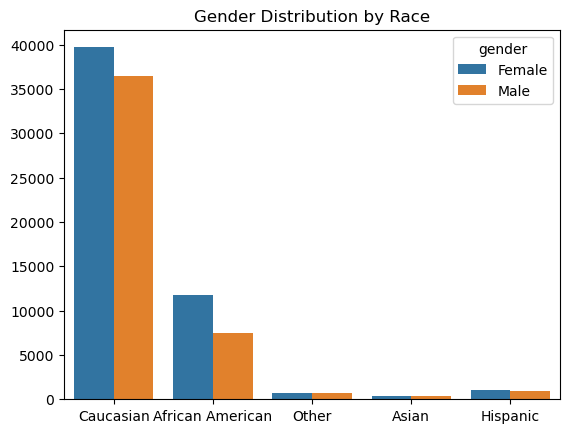

In [22]:
sns.countplot(x='race', hue='gender', data=df)
plt.title('Gender Distribution by Race')
plt.xlabel('')
plt.ylabel('')
plt.show()

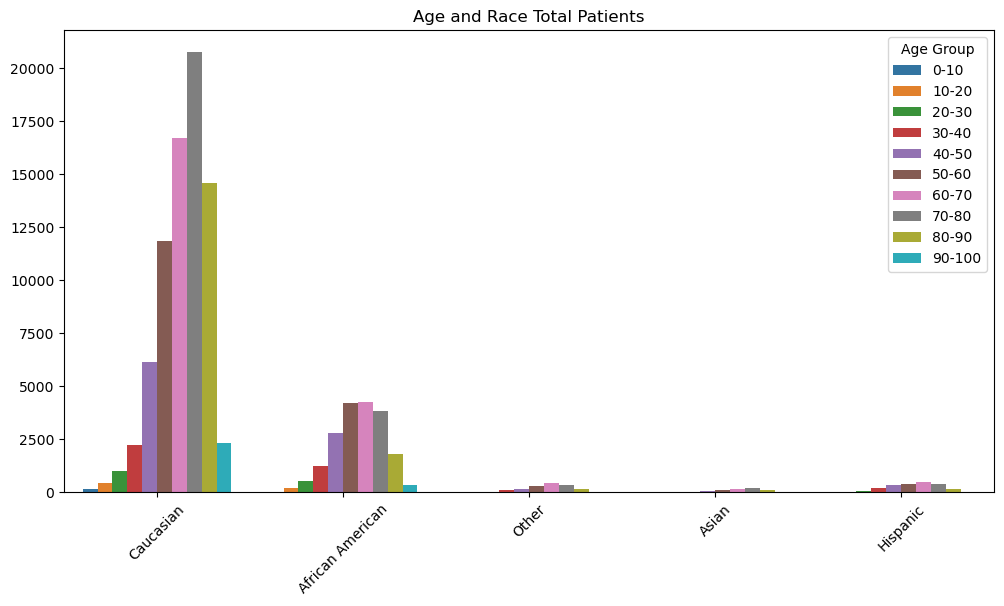

In [23]:
plt.figure(figsize=(12,6))
# When you use dodge=True, it separates the data by hue and places them next to each other
sns.countplot(x='race', hue='age', data=df, dodge=True, palette='tab10') 
plt.title('Age and Race Total Patients')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

In [24]:
# .shape[0] gives the total number of rows in the column.
total_glu = df['max_glu_serum'].shape[0]

In [25]:
total_glu

99492

In [26]:
# This counts the number of NaN values in the max_glu_serum column. 
nan_glu = df['max_glu_serum'].isna().sum()

In [27]:
nan_glu

94202

In [28]:
# Calculating the percentage of NaN values
nan_glu_perc = (nan_glu / total_glu) * 100

In [29]:
# Percentage of Nan is too high to use the max_glu_serum metric to compare values
nan_glu_perc

94.68298958710248

In [30]:
print(df['diabetesMed'].unique())

['No' 'Yes']


In [31]:
print(df['A1Cresult'].unique())

[nan '>7' '>8' 'Norm']


In [32]:
total_a1c = df['A1Cresult'].shape[0]

In [33]:
nan_a1c = df['A1Cresult'].isna().sum()

In [34]:
nan_a1c

82896

In [35]:
nan_a1c_perc = (nan_a1c / total_glu) * 100

In [36]:
# Percentage of Nan is too high to use the A1Cresult metric to compare values
nan_a1c_perc

83.31926185019901

In [37]:
nan_age = df['age'].isna().sum()

In [38]:
nan_age

0

In [39]:
print(df['num_medications'].unique())

[ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 25  4
 32  6 30 26 24 33  5 39  3 29 61 40 46 41 36 34 35 50 43 42 37 51 38 45
 54 52 49 62 55 47 44 48 57 53 59 56 63 58 70 67 64 60 69 65 68 66 81 79
 75 72 74]


In [40]:
nan_num = df['num_medications'].isna().sum()

In [41]:
nan_num

0

In [42]:
print(df['time_in_hospital'].unique())

[ 1  3  2  4  5 13 12  9  7 10 11  6  8 14]


In [43]:
nan_time = df['time_in_hospital'].isna().sum()

In [44]:
nan_time

0

In [45]:
nan_gender = df['gender'].isna().sum()

In [46]:
nan_gender

0

In [47]:
nan_race = df['race'].isna().sum()

In [48]:
nan_race

0

In [49]:
nan_diabmed = df['diabetesMed'].isna().sum()

In [50]:
nan_diabmed

0

In [51]:
nan_read = df['readmitted'].isna().sum()

In [52]:
nan_read

0

In [53]:
print(df['readmitted'].unique())

['NO' '>30' '<30']


In [54]:
comp_diabetesMed_time_readmit = df[['diabetesMed', 'time_in_hospital', 'readmitted']]

In [55]:
comp_diabetesMed_time_readmit

,diabetesMed,time_in_hospital,readmitted
0,No,1,NO
1,Yes,3,>30
2,Yes,2,NO
3,Yes,2,NO
4,Yes,1,NO
...,...,...,...
101761,Yes,3,>30
101762,Yes,5,NO
101763,Yes,1,NO
101764,Yes,10,NO


In [56]:
comp_diabetesMed_time_readmit['diabetesMed'].value_counts()

diabetesMed
Yes    76491
No     23001
Name: count, dtype: int64

In [57]:
comp_diabetesMed_time_readmit['time_in_hospital'].value_counts()

time_in_hospital
3     17342
2     16841
1     13877
4     13605
5      9763
6      7366
7      5720
8      4297
9      2940
10     2291
11     1816
12     1427
13     1189
14     1018
Name: count, dtype: int64

In [58]:
comp_diabetesMed_time_readmit['readmitted'].value_counts()

readmitted
NO     53316
>30    35007
<30    11169
Name: count, dtype: int64

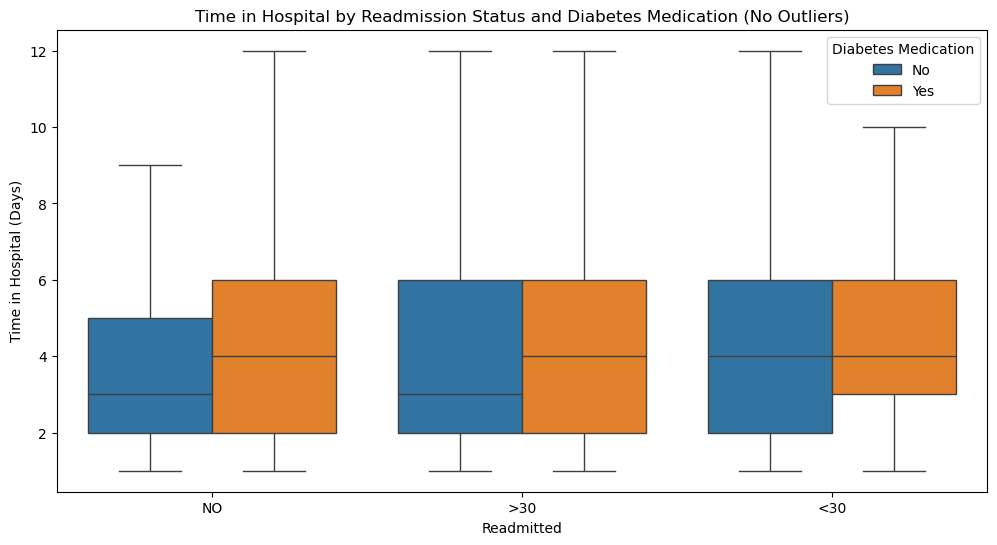

In [59]:
plt.figure(figsize=(12, 6))
# If you want to hide the outliers in a boxplot, you can use the showfliers=False parameter. 
# This will remove the outlier points that are typically displayed as individual dots outside the box in the plot.
sns.boxplot(data=df, x='readmitted', y='time_in_hospital', hue='diabetesMed', showfliers=False)
plt.title('Time in Hospital by Readmission Status and Diabetes Medication (No Outliers)')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital (Days)')
plt.legend(title='Diabetes Medication')
plt.show()

#The box shows the middle 50% of the data.
#The 'whiskers' extend to the highest and lowest values.

In [60]:
#pd.crosstab(): Creates the cross-tabulation, showing how many patients in each combination of diabetesMed and readmitted.
cross_tab = pd.crosstab(df['diabetesMed'], df['readmitted'])

In [61]:
cross_tab

readmitted,<30,>30,NO
diabetesMed,,,
No,2218,7147,13636
Yes,8951,27860,39680


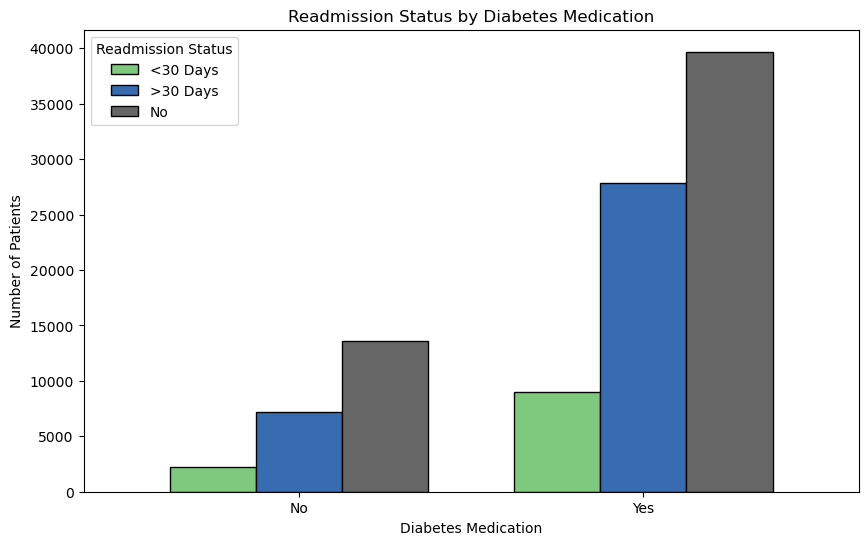

In [62]:
cross_tab.plot(kind='bar', figsize=(10, 6), colormap='Accent', width=.75, edgecolor='black')

plt.title('Readmission Status by Diabetes Medication')
plt.xlabel('Diabetes Medication')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Readmission Status', labels=['<30 Days', '>30 Days', 'No'])

plt.show()

FINDINGS

Diabetes Medication (diabetesMed) Distribution:

    Yes: 76,491 (about 77% of the dataset) are on diabetes medication.

    No: 23,001 (about 23% of the dataset) are not on diabetes medication.

Time in Hospital (time_in_hospital) Distribution:

    The most common time spent in the hospital is 3 days (17,342 patients).
    
    Other frequent durations are 2 days (16,841 patients), 1 day (13,877 patients), and 4 days (13,605 patients).
    
    The least common are 13 days (1,189 patients) and 14 days (1,018 patients).

Readmission Status (readmitted) Distribution:

    No readmission (NO): 53,316 (about 53.6% of patients) were not readmitted.

    >30 days: 35,007 (about 35.2%) patients were readmitted after more than 30 days.

    <30 days: 11,169 (about 11.2%) patients were readmitted within 30 days.


Cross-tabulation between Diabetes Medication and Readmission Status:

Readmission by Diabetes Medication:


  For patients on Diabetes Medication (Yes):

    <30 Days: 11.7% of patients

    >30 Days: 36.4% of patients

    No Readmission (NO): 51.8% of patients

  For patients not on Diabetes Medication (No):

    <30 Days: 9.6% of patients

    >30 Days: 31.1% of patients

    No Readmission (NO): 59.3% of patients

INSIGHTS

Patients on diabetes medication have a higher number of readmissions within 30 days and readmissions after 30 dayscompared to those not on diabetes medication. A larger percentage of patients on diabetes medication were readmitted (either within or after 30 days), indicating that patients on diabetes medication may have more complex health conditions requiring further hospitalization. Patients not on diabetes medication have a higher percentage of non-readmission, possibly suggesting that patients who are not on diabetes medication may have fewer complications or hospital stays that are less likely to require readmission. The high number of patients not readmitted (53,316) shows that a significant portion of the population doesn't experience recurring hospitalizations, which may indicate successful management of their condition.